In [4]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from numpy import cos, sin
from scipy.spatial.distance import cdist

In [5]:
def generate_points(n,L,sigma): #generates n points in the L by L square
    return np.array(np.split(sigma + (L-2*sigma)*np.random.rand(2*n),n))

In [6]:
def direct_sampling(n,L,sigma): #direct sampling: repeatedly samples n points until they form a correct configuration
    test = False
    while not(test):
        X = generate_points(n,L,sigma)
        dist = cdist(X,X)
        dist[dist==0] += np.max(dist)
        if np.min(dist) > 2*sigma:
            test = True
    return(X)

In [7]:
direct_sampling(16,10,0.1)

array([[ 6.26299924,  9.62004588],
       [ 6.32720097,  7.07800926],
       [ 6.46326883,  5.20757235],
       [ 2.73663972,  2.47556471],
       [ 3.71872576,  7.35956309],
       [ 7.33440639,  6.97056084],
       [ 7.96030957,  4.54850616],
       [ 2.84721771,  1.72530877],
       [ 0.44187537,  7.68325747],
       [ 8.97262216,  9.63241804],
       [ 5.31313872,  5.44369088],
       [ 0.6453493 ,  4.63542402],
       [ 6.32162867,  4.00422479],
       [ 4.1147315 ,  7.9673173 ],
       [ 9.65010593,  2.67496784],
       [ 3.55286312,  3.39278738]])

In [8]:
def plot(X,L): #makes plot of points (represented by dots)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_ylim([0, L])
    ax.set_xlim([0, L])
    plt.scatter(X[:,0],X[:,1])
    plt.show()

In [9]:
def plot2(X,L,sigma): #makes plot of points (represented by filled circles)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_ylim([0, L])
    ax.set_xlim([0, L])
    for i, (x,y) in enumerate(X):
        ax.add_artist(plt.Circle((x,y), sigma))
    plt.scatter(X[:,0],X[:,1])
    plt.show()

In [10]:
n = 16
L = 4
sigma = 0.2
X = direct_sampling(n,L,sigma)

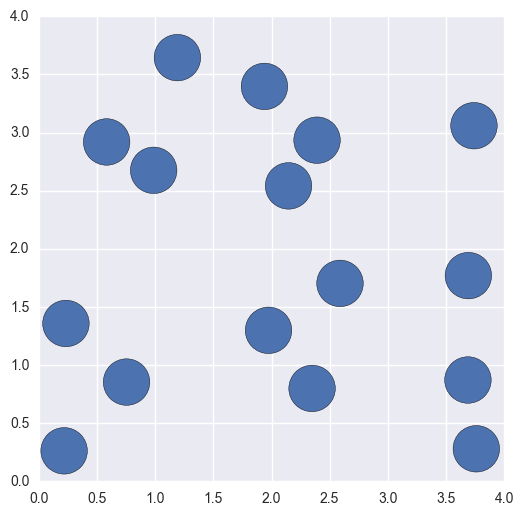

In [11]:
# plot(X,L) #unnecessary
plot2(X,L,sigma)

In [30]:
def periodic_initial_condition(n,L): #regular periodic initial configuration
    m = int(np.sqrt(n))
    l = np.linspace(0,(m-1)/(m)*L,m)+L/(2*m)
    return np.array([(a,b) for a in l for b in l])

In [48]:
n = 4**2
L = 4
sigma = 0.2
X = periodic_initial_condition(n,L)

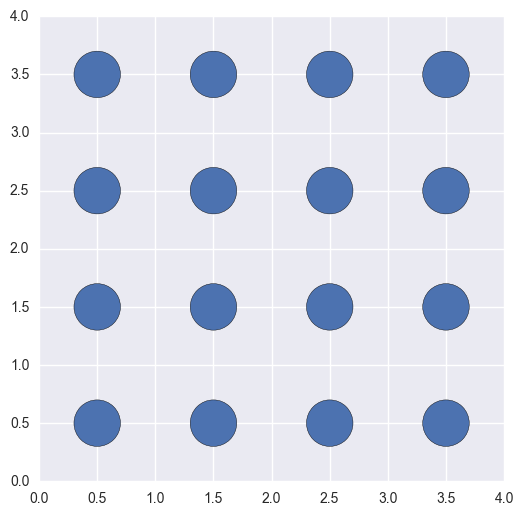

In [49]:
plot2(X,L,sigma)

In [15]:
def rotate(X,theta):
    
    #this functions takes the positions of the disks, and given the direction of the proposed move (theta)
    #rotates the positions of the disks so that the direction of the proposed move is horizontal in the new coordinate
    #system
    
    O = np.array([[cos(-theta),-sin(-theta)],[sin(-theta),cos(-theta)]]) # orthogonal matrix of rotation
    
    return(np.dot(X,O.T))

See effect of rotate function with the next two plots

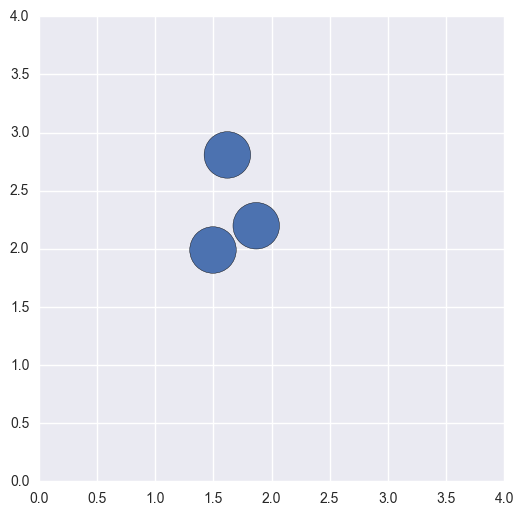

In [16]:
X = direct_sampling(3,4,0.2) # sample three points
plot2(X,4,0.2)

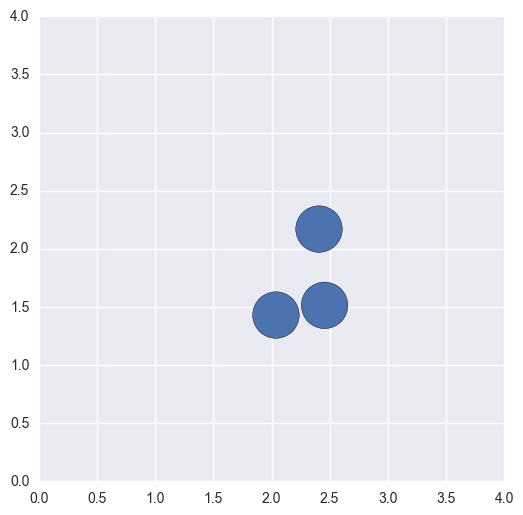

In [17]:
X1 = rotate(X,np.pi/10) # rotate points by angle
plot2(X1,4,0.2)

In [110]:
def MCMC_step(X,L,sigma,stepsize):
    #this function represents an iteration of the MCMC algorithm
    
    #1- Pick a point
    I = np.random.randint(len(X))
    
    #2- Propose a move: direction and distance
    theta,step = (2*np.pi,stepsize) * np.random.rand(2)
    
    #3- Check if proposed move is still inside the box: reject if not
    X_new = np.copy(X)
    X_new[I] += (step*cos(theta),step*sin(theta))
    if not(sigma < X_new[I,0] < L-sigma):
        return(X,False)
    if not(sigma < X_new[I,1] < L-sigma):
        return(X,False)
    
    #4- Rotate points
    X1 = rotate(X,theta)
    X_other = np.delete(X1,I,axis=0) #set of points other than the picked one

    #5- Check if there is a collision: reject if yes
    X_near = X_other[ np.squeeze(cdist(X_other,[X1[I]])) < step + 2*sigma ]
    if len(X_near)==0:
        return(X_new,True)
    
    X2 = X_near[ (X1[I,0] < X_near[:,0])*(X_near[:,0] < X1[I,0] + step) ]
    if (np.sum(np.abs(X2[:,1] - X1[I,1]) < 2*sigma) > 0):
        return(X,False)
    
    if (np.min( np.squeeze( cdist(X_near,[X1[I]+(step,0)]) ) ) < 2*sigma):
        return(X,False)
    
    #6- If the proposed move passed all tests: accept and return new positions
    return(X_new,True)

In [52]:
n = 4**2
L = 4
sigma = 0.2
X = periodic_initial_condition(n,L)

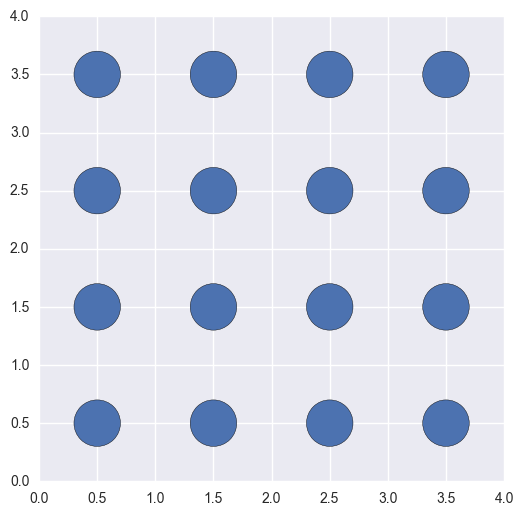

In [53]:
plot2(X,L,sigma)

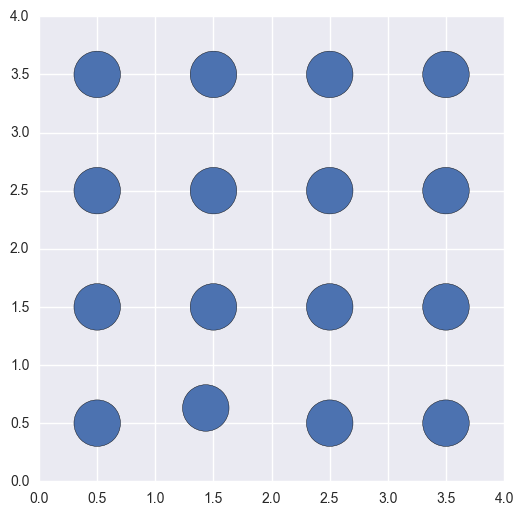

In [68]:
X1,A = MCMC_step(X,L,sigma,3*sigma)
if A: #plot new distribution if the move was accepted
    plot2(X1,L,sigma)

In [124]:
X1 = np.copy(X)
iterations = 1000
delta = 5*sigma
S = 0
for t in range(iterations):
    X1,A = MCMC_step(X1,L,sigma,delta)
    S += A

Acceptance rate = 0.489


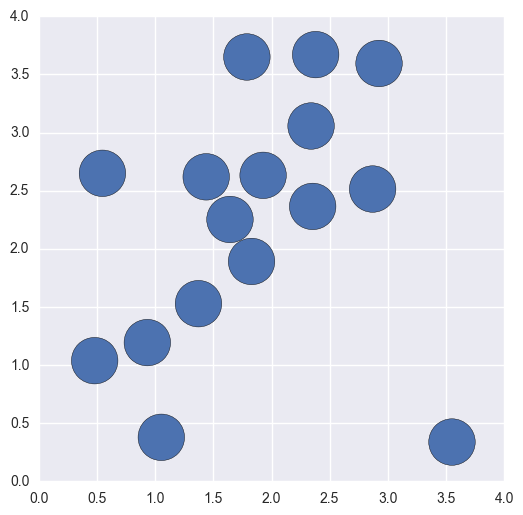

In [125]:
print('Acceptance rate = '+str(S/iterations))
plot2(X1,L,sigma)